In [1]:
import os
from PIL import Image
from matplotlib import pyplot as plt
import pathlib
import PIL
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
root='E:\GG'
fnames=os.listdir(root)

In [3]:
for i in range (len(fnames)):
    a=os.path.join(root,fnames[i])

In [4]:
data_dir=pathlib.Path(a)
data_dir

WindowsPath('E:/GG/Garbage_classification')

In [5]:
image_count=len(list(data_dir.glob('*\*.jpg')))
image_count

5054

In [6]:
cardboard=list(data_dir.glob('cardboard\*'))
cardboard[:5]

[WindowsPath('E:/GG/Garbage_classification/cardboard/cardboard1(1).jpg'),
 WindowsPath('E:/GG/Garbage_classification/cardboard/cardboard1.jpg'),
 WindowsPath('E:/GG/Garbage_classification/cardboard/cardboard10(1).jpg'),
 WindowsPath('E:/GG/Garbage_classification/cardboard/cardboard10.jpg'),
 WindowsPath('E:/GG/Garbage_classification/cardboard/cardboard100(1).jpg')]

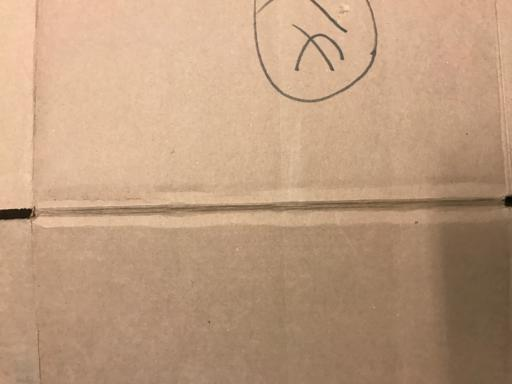

In [7]:
PIL.Image.open(str(cardboard[0]))

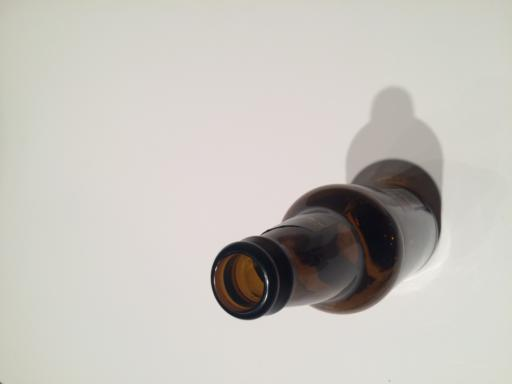

In [8]:
glass=list(data_dir.glob('glass/*'))
PIL.Image.open(str(glass[0]))

In [9]:
garbage_images_dict={
    'cardboard':list(data_dir.glob('cardboard/*')),
    'glass':list(data_dir.glob('glass/*')),
    'metal':list(data_dir.glob('metal/*')),
    'paper':list(data_dir.glob('paper/*')),
    'plastic':list(data_dir.glob('plastic/*')),
    'trash':list(data_dir.glob('trash/*'))
}

In [10]:
garbage_images_dict['paper'][:5]

[WindowsPath('E:/GG/Garbage_classification/paper/paper1(1).jpg'),
 WindowsPath('E:/GG/Garbage_classification/paper/paper1.jpg'),
 WindowsPath('E:/GG/Garbage_classification/paper/paper10(1).jpg'),
 WindowsPath('E:/GG/Garbage_classification/paper/paper10.jpg'),
 WindowsPath('E:/GG/Garbage_classification/paper/paper100(1).jpg')]

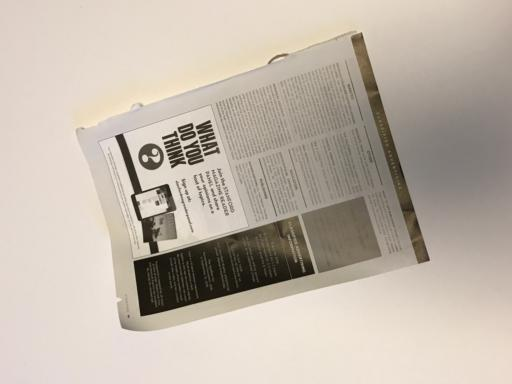

In [11]:
PIL.Image.open(str(garbage_images_dict['paper'][0]))

In [12]:
garbage_labels_dict={
    'cardboard':0,
    'glass':1,
    'metal':2,
    'paper':3,
    'plastic':4,
    'trash':5
}

In [13]:
garbage_labels_dict['cardboard']

0

In [14]:
garbage_labels_dict['trash']

5

In [15]:
for garbage_name,images in garbage_images_dict.items():
    print(garbage_name)
    print(len(images))

cardboard
806
glass
1002
metal
820
paper
1188
plastic
964
trash
274


In [16]:
X=[]
y=[]

for garbage_name,images in garbage_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(200,200))
        X.append(resized_image)
        y.append(garbage_labels_dict[garbage_name])

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
y[1000:1005]

[1, 1, 1, 1, 1]

In [19]:
X[0]

array([[[166, 201, 241],
        [168, 203, 243],
        [167, 202, 242],
        ...,
        [145, 174, 218],
        [141, 170, 214],
        [143, 172, 216]],

       [[169, 204, 244],
        [170, 205, 245],
        [168, 203, 243],
        ...,
        [144, 173, 217],
        [145, 174, 218],
        [142, 171, 215]],

       [[170, 205, 245],
        [171, 206, 246],
        [170, 205, 245],
        ...,
        [143, 172, 216],
        [147, 176, 220],
        [143, 172, 216]],

       ...,

       [[122, 151, 189],
        [118, 144, 183],
        [118, 144, 181],
        ...,
        [ 65,  87, 112],
        [ 67,  89, 114],
        [ 69,  91, 116]],

       [[119, 148, 188],
        [122, 149, 188],
        [118, 144, 181],
        ...,
        [ 65,  88, 113],
        [ 67,  89, 114],
        [ 68,  90, 115]],

       [[118, 147, 186],
        [118, 145, 183],
        [119, 145, 183],
        ...,
        [ 66,  88, 113],
        [ 67,  89, 114],
        [ 68,  90, 115]]

In [20]:
X=np.array(X)
y=np.array(y)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
len(X_train)

4043

In [23]:
len(X_test)

1011

In [24]:
X_train.shape

(4043, 200, 200, 3)

In [25]:
X_test.shape

(1011, 200, 200, 3)

In [26]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [27]:
X_train_scaled[0]

array([[[0.77254902, 0.78431373, 0.8       ],
        [0.77254902, 0.78431373, 0.8       ],
        [0.77254902, 0.78431373, 0.8       ],
        ...,
        [0.7372549 , 0.78431373, 0.79215686],
        [0.7372549 , 0.78431373, 0.79215686],
        [0.7372549 , 0.78431373, 0.79215686]],

       [[0.77254902, 0.78431373, 0.8       ],
        [0.77254902, 0.78431373, 0.8       ],
        [0.77254902, 0.78431373, 0.8       ],
        ...,
        [0.7372549 , 0.78431373, 0.79215686],
        [0.7372549 , 0.78431373, 0.79215686],
        [0.7372549 , 0.78431373, 0.79215686]],

       [[0.77647059, 0.78823529, 0.80392157],
        [0.77647059, 0.78823529, 0.80392157],
        [0.77647059, 0.78823529, 0.80392157],
        ...,
        [0.7372549 , 0.78431373, 0.79215686],
        [0.7372549 , 0.78431373, 0.79215686],
        [0.7372549 , 0.78431373, 0.79215686]],

       ...,

       [[0.85882353, 0.8745098 , 0.87843137],
        [0.85882353, 0.8745098 , 0.87843137],
        [0.85882353, 0

In [28]:
X_test_scaled[0]

array([[[0.71764706, 0.76078431, 0.81568627],
        [0.71764706, 0.76078431, 0.81568627],
        [0.71764706, 0.76078431, 0.81568627],
        ...,
        [0.78431373, 0.85490196, 0.92156863],
        [0.78823529, 0.85882353, 0.9254902 ],
        [0.79215686, 0.8627451 , 0.92941176]],

       [[0.71764706, 0.76078431, 0.81568627],
        [0.71764706, 0.76078431, 0.81568627],
        [0.71764706, 0.76078431, 0.81568627],
        ...,
        [0.78431373, 0.85490196, 0.92156863],
        [0.78823529, 0.85882353, 0.9254902 ],
        [0.79215686, 0.8627451 , 0.92941176]],

       [[0.71764706, 0.76078431, 0.81568627],
        [0.71764706, 0.76078431, 0.81568627],
        [0.71764706, 0.76078431, 0.81568627],
        ...,
        [0.78431373, 0.85490196, 0.92156863],
        [0.78823529, 0.85882353, 0.9254902 ],
        [0.79215686, 0.8627451 , 0.92941176]],

       ...,

       [[0.73333333, 0.76862745, 0.81960784],
        [0.73333333, 0.76862745, 0.81960784],
        [0.73333333, 0

In [29]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(200,200,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [30]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(50,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(35,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(20,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(6,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
127/127 [==============================] - 259s 2s/step - loss: 1.4930 - accuracy: 0.3881
Epoch 2/30
127/127 [==============================] - 232s 2s/step - loss: 1.2474 - accuracy: 0.5105
Epoch 3/30
127/127 [==============================] - 228s 2s/step - loss: 1.1082 - accuracy: 0.5654
Epoch 4/30
127/127 [==============================] - 229s 2s/step - loss: 1.0269 - accuracy: 0.6050
Epoch 5/30
127/127 [==============================] - 229s 2s/step - loss: 0.9420 - accuracy: 0.6463
Epoch 6/30
127/127 [==============================] - 229s 2s/step - loss: 0.8923 - accuracy: 0.6733
Epoch 7/30
127/127 [==============================] - 229s 2s/step - loss: 0.8078 - accuracy: 0.7024
Epoch 8/30
127/127 [==============================] - 229s 2s/step - loss: 0.7722 - accuracy: 0.7257
Epoch 9/30
127/127 [==============================] - 230s 2s/step - loss: 0.7033 - accuracy: 0.7341
Epoch 10/30
127/127 [==============================] - 231s 2s/step - loss: 0.6875 - accura

In [31]:
model.evaluate(X_test_scaled,y_test)

32/32 [==============================] - 17s 455ms/step - loss: 0.4063 - accuracy: 0.8833


[0.4063470661640167, 0.8832838535308838]